<a href="https://colab.research.google.com/github/Bbeta-bit/6810_49/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Feature Engineering for Your Filename
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

## Load dataset

In [ ]:
df_olist_customers_dataset = pd.read_csv('/raid/yil708/feature_engineering/olist_customers_dataset.csv')
df_olist_orders_dataset = pd.read_csv('/raid/yil708/feature_engineering/olist_orders_dataset.csv')
df_olist_order_payments_dataset = pd.read_csv('/raid/yil708/feature_engineering/olist_order_payments_dataset.csv')
df_olist_order_reviews_dataset = pd.read_csv('/raid/yil708/feature_engineering/olist_order_reviews_dataset.csv')
df_olist_order_items_dataset = pd.read_csv('/raid/yil708/feature_engineering/olist_order_items_dataset.csv')
df_olist_products_dataset = pd.read_csv('/raid/yil708/feature_engineering/olist_products_dataset.csv')
df_olist_sellers_dataset = pd.read_csv('/raid/yil708/feature_engineering/olist_sellers_dataset.csv')
df_product_category_name_translation = pd.read_csv('/raid/yil708/feature_engineering/product_category_name_translation.csv')
df_olist_geolocation_dataset = pd.read_csv('/raid/yil708/feature_engineering/olist_geolocation_dataset.csv')
# df_olist_customers_dataset = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/olist_customers_dataset.csv')
# df_olist_orders_dataset = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/olist_orders_dataset.csv')
# df_olist_order_payments_dataset = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/olist_order_payments_dataset.csv')
# df_olist_order_reviews_dataset = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/olist_order_reviews_dataset.csv')
# df_olist_order_items_dataset = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/olist_order_items_dataset.csv')
# df_olist_products_dataset = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/olist_products_dataset.csv')
# df_olist_sellers_dataset = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/olist_sellers_dataset.csv')
# df_product_category_name_translation = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/product_category_name_translation.csv')
# df_olist_geolocation_dataset = pd.read_csv('/content/drive/MyDrive/Qbus/6810/Group-assignment/olist_geolocation_dataset.csv')

## Calculate CLV
In this feature engineering process, we are focusing on creating and transforming features that are critical for accurately predicting Customer Lifetime Value (CLV) for each customer in the Olist e-commerce dataset. CLV is defined as:

***CLV = Average Order Value × Purchase Frequency × Customer Lifespan***

This definition aligns with our business problem, where we aim to leverage historical transaction data to predict the total expected revenue from each customer. Our feature engineering steps are carefully designed to capture the three essential components of CLV in a way that is consistent, interpretable, and predictive.

### AOV Calculation
The Average Order Value (AOV) is a critical component of CLV, representing the average amount spent by a customer in each transaction. We calculate AOV by dividing the total payment value by the total number of orders for each customer.

In [ ]:
print("Step 1: Calculating AOV...")
df_AOV = df_olist_order_items_dataset.groupby('order_id').agg(
    order_total=('price', 'sum')
).reset_index()

df_AOV = pd.merge(df_AOV, df_olist_orders_dataset[['order_id', 'customer_id']], on='order_id')
df_AOV = pd.merge(df_AOV, df_olist_customers_dataset[['customer_id', 'customer_unique_id']], on='customer_id')

df_AOV_grouped = df_AOV.groupby('customer_unique_id').agg(
    total_order_amount=('order_total', 'sum'),
    order_count=('order_id', 'count')
).reset_index()

df_AOV_grouped['AOV'] = df_AOV_grouped['total_order_amount'] / df_AOV_grouped['order_count']

print("AOV Calculation Result (First 5 Rows):")
print(df_AOV_grouped.head(30))

# print("\nFull AOV Calculation DataFrame:")
# print(df_AOV_grouped)

Step 1: Calculating AOV...
AOV Calculation Result (First 5 Rows):
                  customer_unique_id  total_order_amount  order_count     AOV
0   0000366f3b9a7992bf8c76cfdf3221e2              129.90            1  129.90
1   0000b849f77a49e4a4ce2b2a4ca5be3f               18.90            1   18.90
2   0000f46a3911fa3c0805444483337064               69.00            1   69.00
3   0000f6ccb0745a6a4b88665a16c9f078               25.99            1   25.99
4   0004aac84e0df4da2b147fca70cf8255              180.00            1  180.00
5   0004bd2a26a76fe21f786e4fbd80607f              154.00            1  154.00
6   00050ab1314c0e55a6ca13cf7181fecf               27.99            1   27.99
7   00053a61a98854899e70ed204dd4bafe              382.00            1  382.00
8   0005e1862207bf6ccc02e4228effd9a0              135.00            1  135.00
9   0005ef4cd20d2893f0d9fbd94d3c0d97              104.90            1  104.90
10  0006fdc98a402fceb4eb0ee528f6a8d4               13.90            1   13.9

### Purchase Frequency Calculation (PF)
Purchase Frequency indicates how often a customer makes a purchase within a given period. We derive Purchase Frequency by counting the total number of unique orders each customer has made in the overall dataset. Customers with higher purchase frequencies are typically more valuable to the business.

In [ ]:
print("\nStep 2: Calculating Purchase Frequency (PF)...")
df_PF = pd.merge(df_olist_orders_dataset, df_olist_customers_dataset[['customer_id', 'customer_unique_id']], on='customer_id')
df_PF = df_PF.groupby('customer_unique_id').agg(
    PF=('order_id', 'nunique')
).reset_index()

print("Purchase Frequency (PF) Result (First 5 Rows):")
print(df_PF.head(25))


Step 2: Calculating Purchase Frequency (PF)...
Purchase Frequency (PF) Result (First 5 Rows):
                  customer_unique_id  PF
0   0000366f3b9a7992bf8c76cfdf3221e2   1
1   0000b849f77a49e4a4ce2b2a4ca5be3f   1
2   0000f46a3911fa3c0805444483337064   1
3   0000f6ccb0745a6a4b88665a16c9f078   1
4   0004aac84e0df4da2b147fca70cf8255   1
5   0004bd2a26a76fe21f786e4fbd80607f   1
6   00050ab1314c0e55a6ca13cf7181fecf   1
7   00053a61a98854899e70ed204dd4bafe   1
8   0005e1862207bf6ccc02e4228effd9a0   1
9   0005ef4cd20d2893f0d9fbd94d3c0d97   1
10  0006fdc98a402fceb4eb0ee528f6a8d4   1
11  00082cbe03e478190aadbea78542e933   1
12  00090324bbad0e9342388303bb71ba0a   1
13  000949456b182f53c18b68d6babc79c1   1
14  000a5ad9c4601d2bbdd9ed765d5213b3   1
15  000bfa1d2f1a41876493be685390d6d3   1
16  000c8bdb58a29e7115cfc257230fb21b   1
17  000d460961d6dbfa3ec6c9f5805769e1   1
18  000de6019bb59f34c099a907c151d855   1
19  000e309254ab1fc5ba99dd469d36bdb4   1
20  000ec5bff359e1c0ad76a81a45cb598f   1
21 

### Customer Lifespan Calculation (LS)
Customer Lifespan measures the duration over which a customer has remained active on the platform. We calculate Customer Lifespan as the difference between the first and last purchase dates for each customer. A longer lifespan indicates greater customer retention, directly contributing to higher CLV.

In [ ]:
print("\nStep 3: Calculating Customer Lifespan (LS)...")
orders_customers = pd.merge(
    df_olist_orders_dataset[['customer_id', 'order_purchase_timestamp']],
    df_olist_customers_dataset[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

orders_customers['order_purchase_timestamp'] = pd.to_datetime(orders_customers['order_purchase_timestamp'])

lifespan_df = orders_customers.groupby('customer_unique_id').agg(
    first_purchase=('order_purchase_timestamp', 'min'),
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()

lifespan_df['Customer_Lifespan'] = (lifespan_df['last_purchase'] - lifespan_df['first_purchase']).dt.days
lifespan_df['Customer_Lifespan'] = lifespan_df['Customer_Lifespan'].apply(lambda x: max(x, 1))

print("Customer Lifespan (LS) Calculation Result (First 5 Rows):")
print(lifespan_df.head(25))


Step 3: Calculating Customer Lifespan (LS)...
Customer Lifespan (LS) Calculation Result (First 5 Rows):
                  customer_unique_id      first_purchase       last_purchase  \
0   0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27 2018-05-10 10:56:27   
1   0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27 2018-05-07 11:11:27   
2   0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03 2017-03-10 21:05:03   
3   0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41 2017-10-12 20:29:41   
4   0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42 2017-11-14 19:45:42   
5   0004bd2a26a76fe21f786e4fbd80607f 2018-04-05 19:33:16 2018-04-05 19:33:16   
6   00050ab1314c0e55a6ca13cf7181fecf 2018-04-20 12:57:23 2018-04-20 12:57:23   
7   00053a61a98854899e70ed204dd4bafe 2018-02-28 11:15:41 2018-02-28 11:15:41   
8   0005e1862207bf6ccc02e4228effd9a0 2017-03-04 23:32:12 2017-03-04 23:32:12   
9   0005ef4cd20d2893f0d9fbd94d3c0d97 2018-03-12 15:22:12 2018-03-12 15:22:12   
10  0006fdc98a4

### CLV Calculation

In [ ]:
print("\nStep 4: Calculating CLV...")
df_CLV = pd.merge(df_AOV_grouped[['customer_unique_id', 'AOV']], df_PF, on='customer_unique_id')
df_CLV = pd.merge(df_CLV, lifespan_df[['customer_unique_id', 'Customer_Lifespan']], on='customer_unique_id')

df_CLV['CLV'] = df_CLV['AOV'] * df_CLV['PF'] * df_CLV['Customer_Lifespan']

print("CLV Calculation Result (First 5 Rows):")
print(df_CLV.head())


Step 4: Calculating CLV...
CLV Calculation Result (First 5 Rows):
                 customer_unique_id     AOV  PF  Customer_Lifespan     CLV
0  0000366f3b9a7992bf8c76cfdf3221e2  129.90   1                  1  129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f   18.90   1                  1   18.90
2  0000f46a3911fa3c0805444483337064   69.00   1                  1   69.00
3  0000f6ccb0745a6a4b88665a16c9f078   25.99   1                  1   25.99
4  0004aac84e0df4da2b147fca70cf8255  180.00   1                  1  180.00


## Exploratory Data Analysis
The purpose of Exploratory Data Analysis (EDA) is to gain a deep understanding of the dataset, identify data quality issues, detect potential biases, and explore the distribution of both numerical and categorical variables. We began by analyzing the distribution of numerical variables, calculating descriptive statistics (mean, median, standard deviation) to detect potential outliers and understand value ranges. We visualized the distribution of key numerical variables using histograms and box plots, making it easier to spot skewness or extreme values. We then analyzed categorical variables, examining their unique values and frequency distribution to identify potential data quality issues, such as missing values or imbalanced categories.

In [ ]:
print("\nDataset Overviews:")
datasets = {
    "Orders": df_olist_orders_dataset,
    "Customers": df_olist_customers_dataset,
    "Order Items": df_olist_order_items_dataset,
    "Order Payments": df_olist_order_payments_dataset,
    "Order Reviews": df_olist_order_reviews_dataset,
    "Products": df_olist_products_dataset,
    "Sellers": df_olist_sellers_dataset
}

for name, df in datasets.items():
    print(f"\n{name} Dataset: ")
    print(f"Shape: {df.shape}")
    print(df.info())

# Check for duplicated rows
for name, df in datasets.items():
    print(f"\n{name} - Duplicated Rows: {df.duplicated().sum()}")

# Check for missing values
for name, df in datasets.items():
    print(f"\n{name} - Missing Values:")
    print(df.isnull().sum().sort_values(ascending=False))


Dataset Overviews:

Orders Dataset: 
Shape: (99441, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Customers Dataset: 
Shape: (99441, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 


In [ ]:
# Self-defined feature types
feature_types = {
    "Orders": {
        "Numerical Features": [],
        "Categorical Features": [
            'order_id', 'customer_id', 'order_status',
            'order_purchase_timestamp', 'order_approved_at',
            'order_delivered_carrier_date', 'order_delivered_customer_date',
            'order_estimated_delivery_date'
        ]
    },
    "Customers": {
        "Numerical Features": [],
        "Categorical Features": [
            'customer_id', 'customer_unique_id', 'customer_city',
            'customer_state', 'customer_zip_code_prefix'
        ]
    },
    "Order Items": {
        "Numerical Features": ['price', 'freight_value'],
        "Categorical Features": [
            'order_id', 'order_item_id', 'product_id',
            'seller_id', 'shipping_limit_date'
        ]
    },
    "Order Payments": {
        "Numerical Features": ['payment_value'],
        "Categorical Features": [
            'order_id', 'payment_type', 'payment_installments'
        ]
    },
    "Order Reviews": {
        "Numerical Features": [],
        "Categorical Features": [
            'review_id', 'review_score', 'order_id', 'review_comment_title',
            'review_comment_message', 'review_creation_date',
            'review_answer_timestamp'
        ]
    },
    "Products": {
        "Numerical Features": [
            'product_name_lenght', 'product_description_lenght',
            'product_photos_qty', 'product_weight_g',
            'product_length_cm', 'product_height_cm', 'product_width_cm'
        ],
        "Categorical Features": [
            'product_id', 'product_category_name'
        ]
    },
    "Sellers": {
        "Numerical Features": [],
        "Categorical Features": [
            'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'
        ]
    }
}
for dataset, types in feature_types.items():
    print(f"\n{dataset} Dataset Feature Types (Manually Defined):")
    print(f"Numerical Features: {types['Numerical Features']}")
    print(f"Categorical Features: {types['Categorical Features']}")


Orders Dataset Feature Types (Manually Defined):
Numerical Features: []
Categorical Features: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Customers Dataset Feature Types (Manually Defined):
Numerical Features: []
Categorical Features: ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'customer_zip_code_prefix']

Order Items Dataset Feature Types (Manually Defined):
Numerical Features: ['price', 'freight_value']
Categorical Features: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date']

Order Payments Dataset Feature Types (Manually Defined):
Numerical Features: ['payment_value']
Categorical Features: ['order_id', 'payment_type', 'payment_installments']

Order Reviews Dataset Feature Types (Manually Defined):
Numerical Features: []
Categorical Features: ['review_id', 'review_score', 'order_i


================= Orders Dataset =================

Numerical Features Analysis:

Numerical Feature Analysis:
No meaningful numerical features in this dataset.

Categorical Features Analysis:

Categorical Feature Analysis:

order_status - Unique Values: 8
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


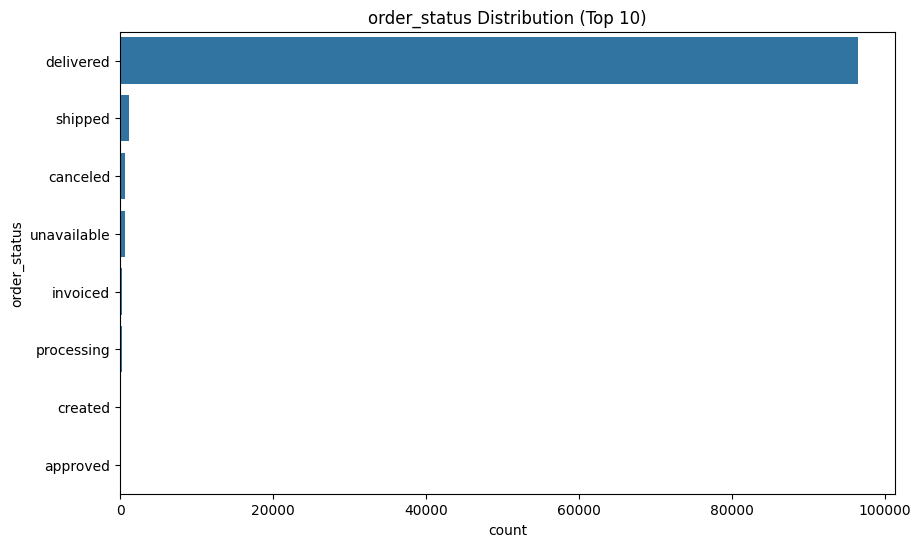


order_purchase_timestamp - Unique Values: 98875
order_purchase_timestamp
2018-04-11 10:48:14    3
2018-07-28 13:11:22    3
2017-11-20 10:59:08    3
2018-08-02 12:05:26    3
2018-08-02 12:06:09    3
2018-06-01 13:39:44    3
2018-03-31 15:08:21    3
2018-02-19 15:37:47    3
2018-08-02 12:06:07    3
2017-11-20 11:46:30    3
Name: count, dtype: int64


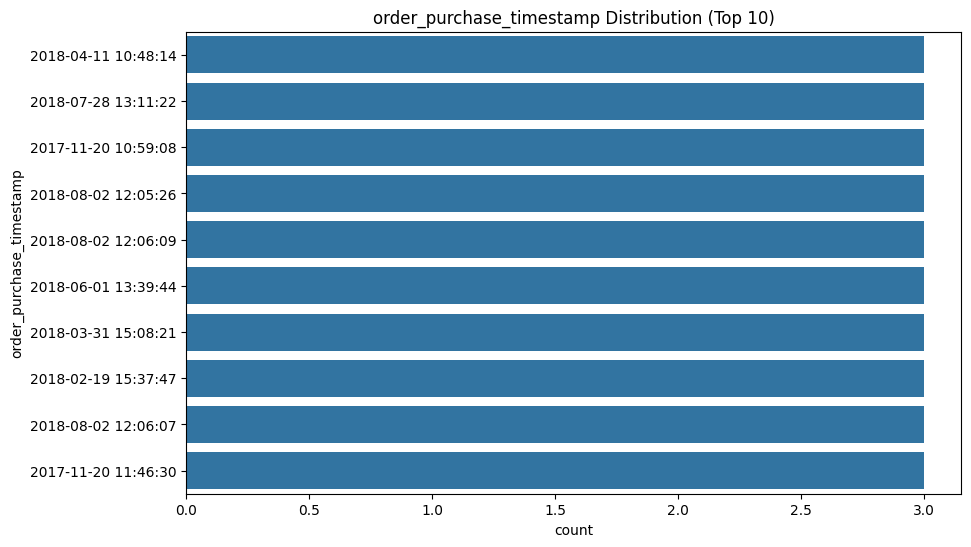


order_approved_at - Unique Values: 90733
order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
2018-01-10 10:32:03    7
2017-12-05 10:30:42    7
2018-07-05 16:33:01    7
2018-05-15 03:55:59    6
2017-11-07 07:30:50    6
Name: count, dtype: int64


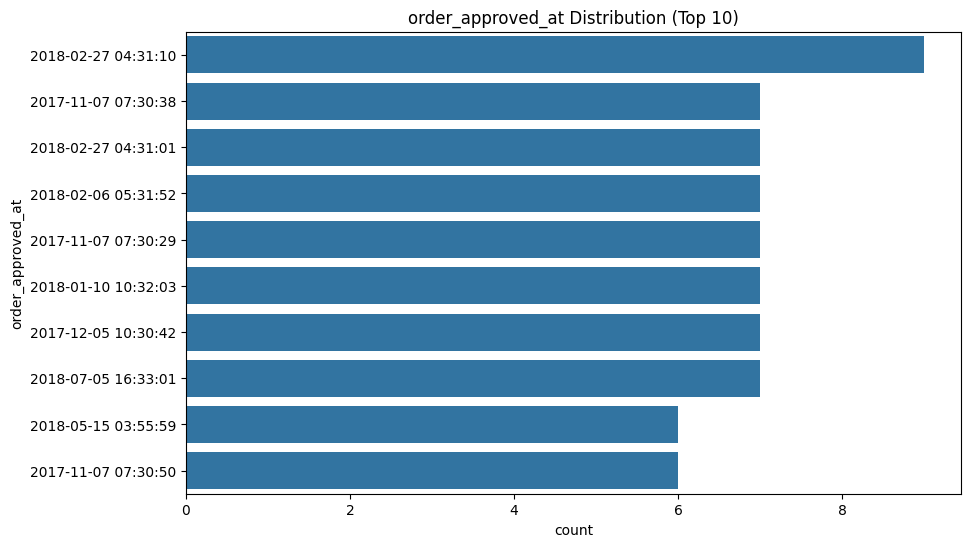


order_delivered_carrier_date - Unique Values: 81018
order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
2018-05-16 13:44:00    15
2018-08-03 15:10:00    15
2018-07-17 14:16:00    15
2018-08-08 15:01:00    15
2018-05-02 12:26:00    14
Name: count, dtype: int64


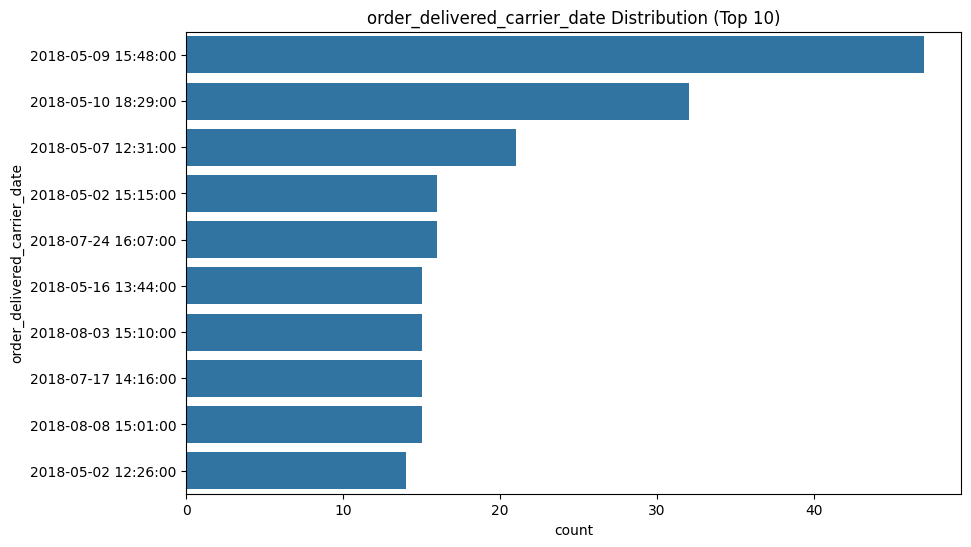


order_delivered_customer_date - Unique Values: 95664
order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
2017-12-02 00:26:45    3
2018-05-14 20:02:44    3
2018-07-24 21:36:42    3
2018-02-08 22:23:05    2
2018-06-20 16:56:57    2
Name: count, dtype: int64


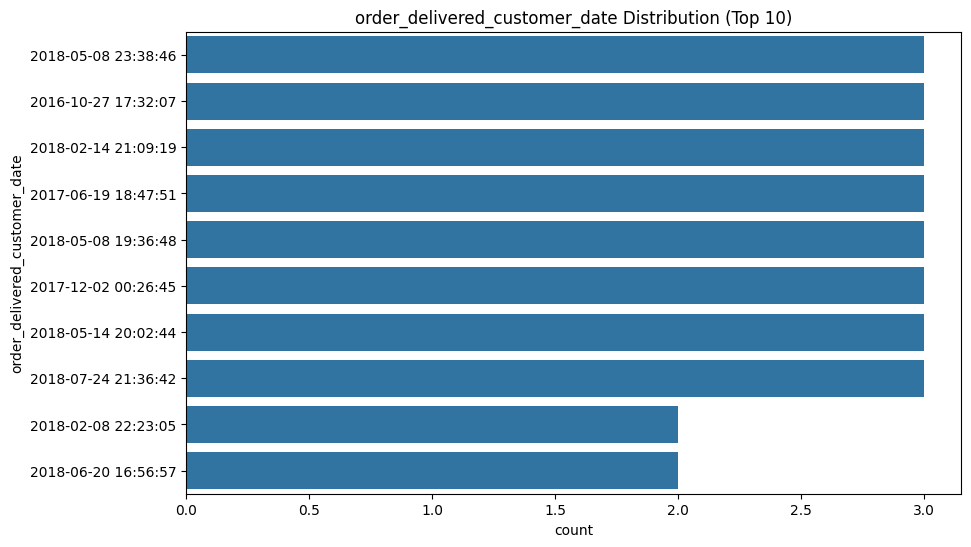


order_estimated_delivery_date - Unique Values: 459
order_estimated_delivery_date
2017-12-20 00:00:00    522
2018-03-12 00:00:00    516
2018-05-29 00:00:00    513
2018-03-13 00:00:00    513
2018-02-14 00:00:00    507
2017-12-18 00:00:00    493
2018-05-28 00:00:00    492
2018-03-06 00:00:00    492
2018-02-06 00:00:00    491
2018-04-12 00:00:00    490
Name: count, dtype: int64


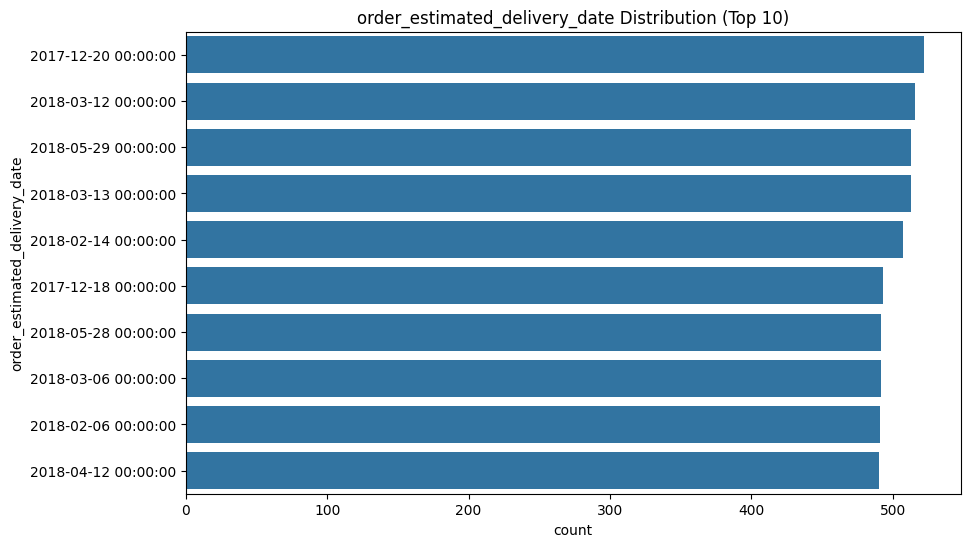


================= Customers Dataset =================

Numerical Features Analysis:

Numerical Feature Analysis:
No meaningful numerical features in this dataset.

Categorical Features Analysis:

Categorical Feature Analysis:

customer_city - Unique Values: 4119
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


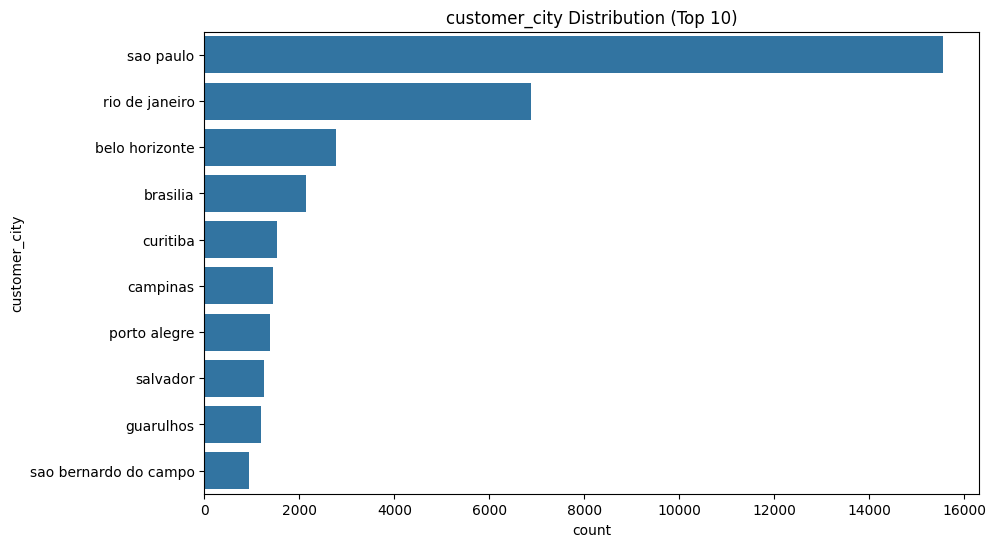


customer_state - Unique Values: 27
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64


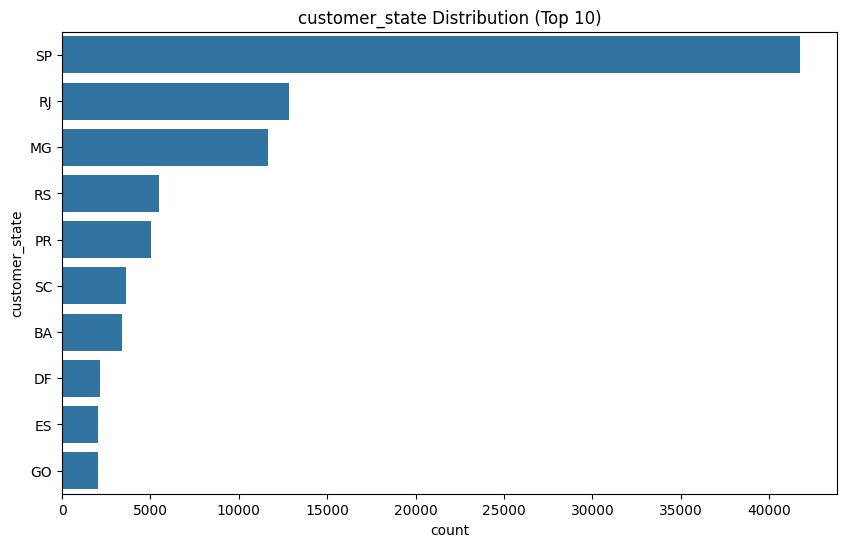


customer_zip_code_prefix - Unique Values: 14994
customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: count, dtype: int64


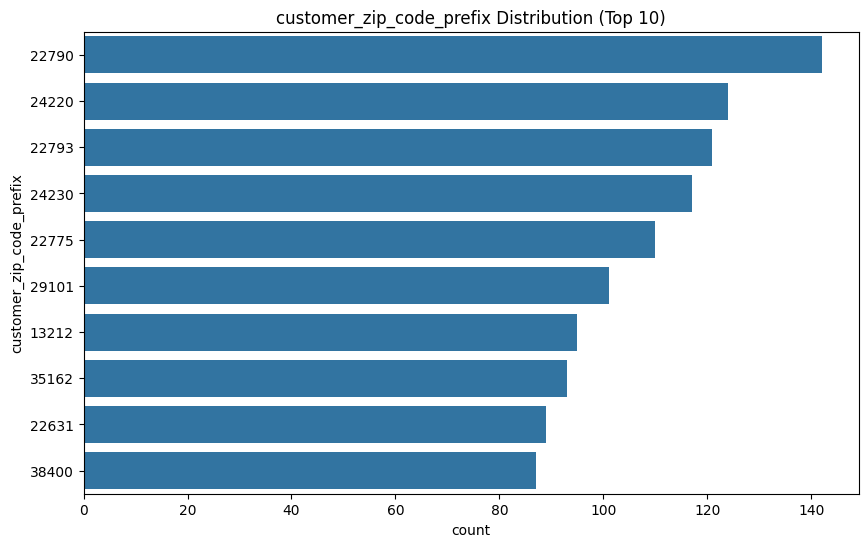


================= Order Items Dataset =================

Numerical Features Analysis:

Numerical Feature Analysis:
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


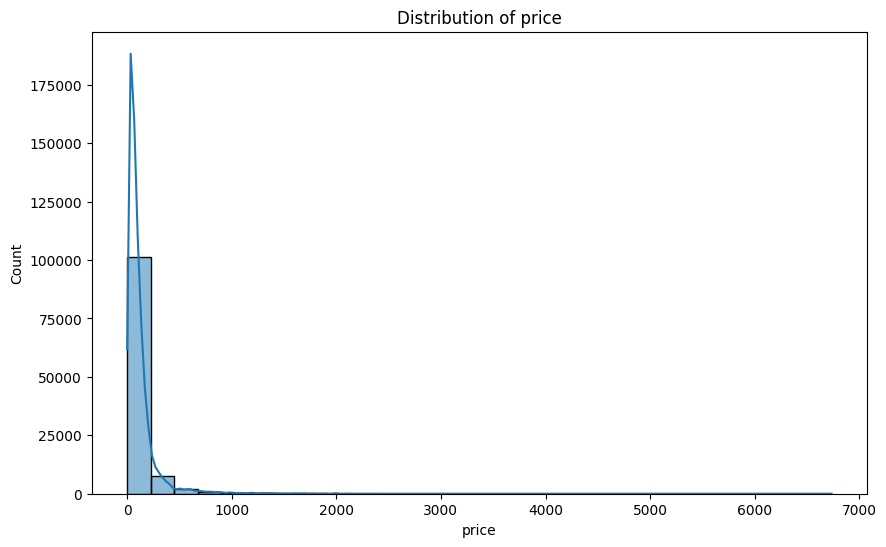

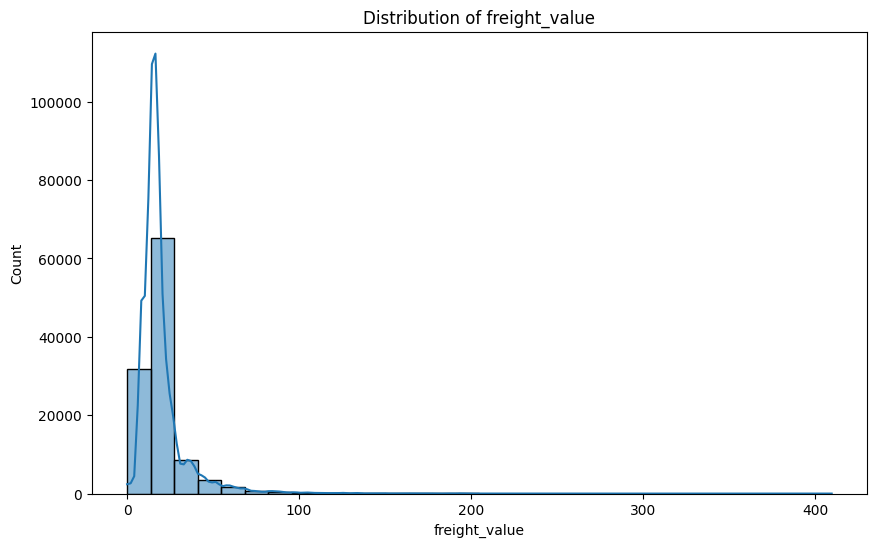


Categorical Features Analysis:

Categorical Feature Analysis:

shipping_limit_date - Unique Values: 93318
shipping_limit_date
2017-07-21 18:25:23    21
2018-03-01 02:50:48    21
2017-08-30 14:30:23    20
2017-02-03 21:44:49    15
2017-12-21 02:30:41    15
2017-11-30 10:30:51    15
2018-02-28 11:48:12    14
2018-04-19 02:30:52    13
2018-04-25 22:11:43    13
2018-06-13 17:30:35    13
Name: count, dtype: int64


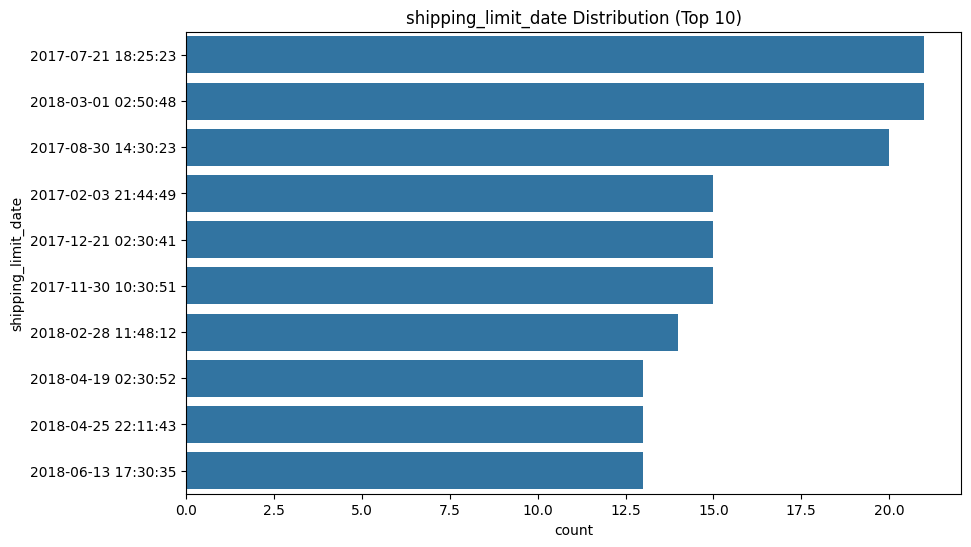


================= Order Payments Dataset =================

Numerical Features Analysis:

Numerical Feature Analysis:
       payment_value
count  103886.000000
mean      154.100380
std       217.494064
min         0.000000
25%        56.790000
50%       100.000000
75%       171.837500
max     13664.080000


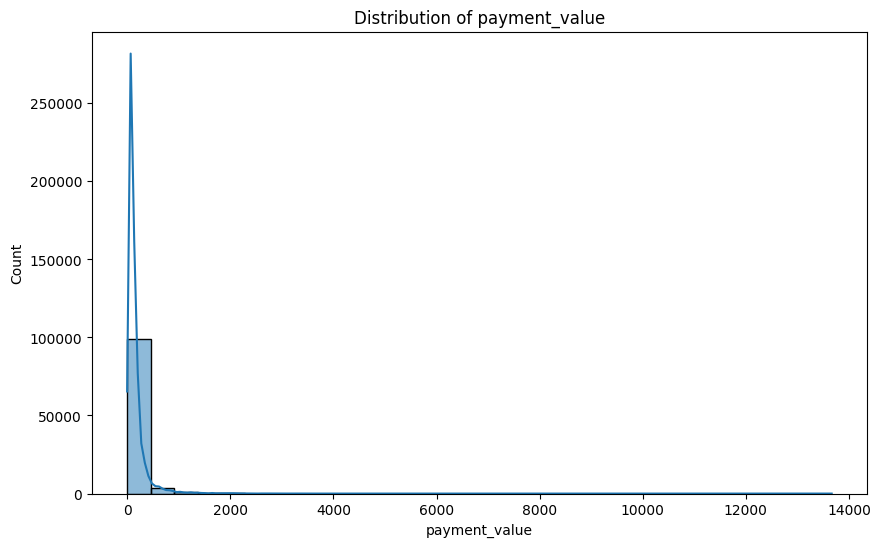


Categorical Features Analysis:

Categorical Feature Analysis:

payment_type - Unique Values: 5
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


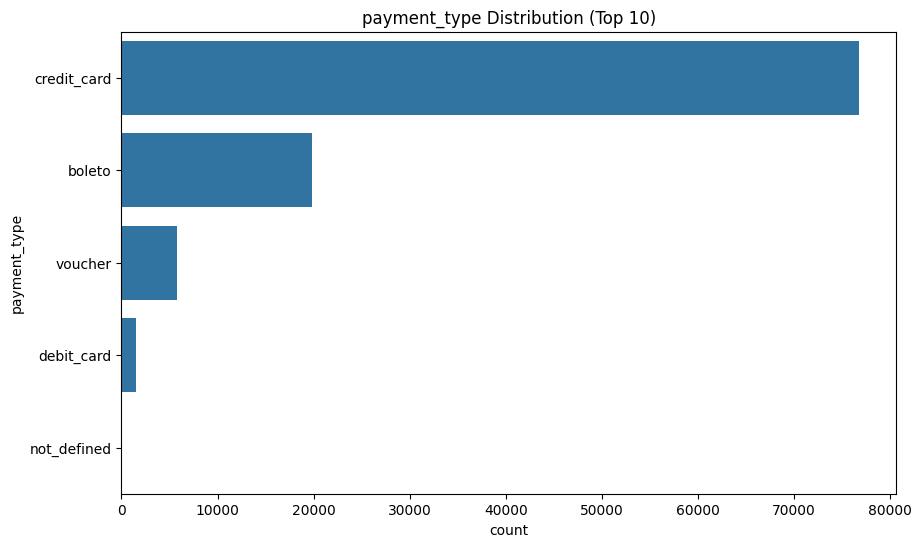


payment_installments - Unique Values: 24
payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
Name: count, dtype: int64


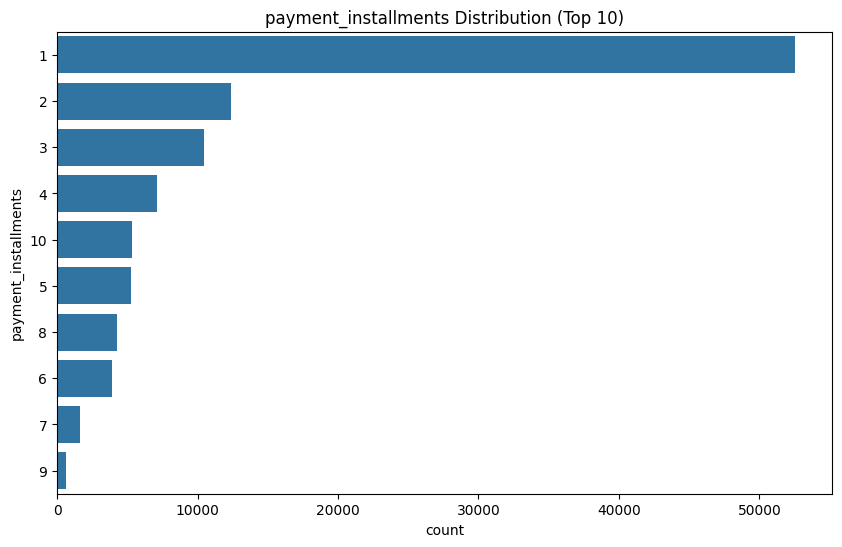


================= Order Reviews Dataset =================

Numerical Features Analysis:

Numerical Feature Analysis:
No meaningful numerical features in this dataset.

Categorical Features Analysis:

Categorical Feature Analysis:

review_score - Unique Values: 5
review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


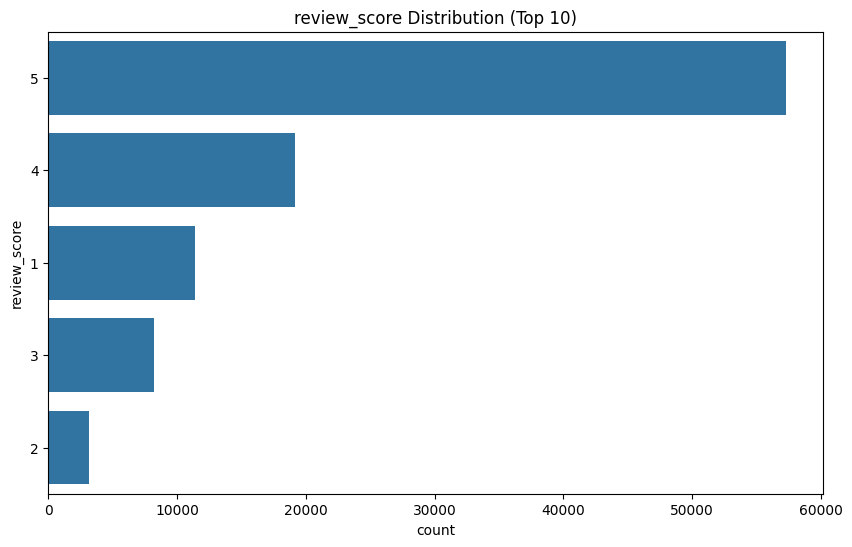


review_creation_date - Unique Values: 636
review_creation_date
2017-12-19 00:00:00    463
2018-08-28 00:00:00    452
2017-12-20 00:00:00    440
2018-05-19 00:00:00    434
2018-05-15 00:00:00    425
2018-08-14 00:00:00    423
2018-03-29 00:00:00    421
2018-05-22 00:00:00    414
2018-05-04 00:00:00    412
2018-04-12 00:00:00    408
Name: count, dtype: int64


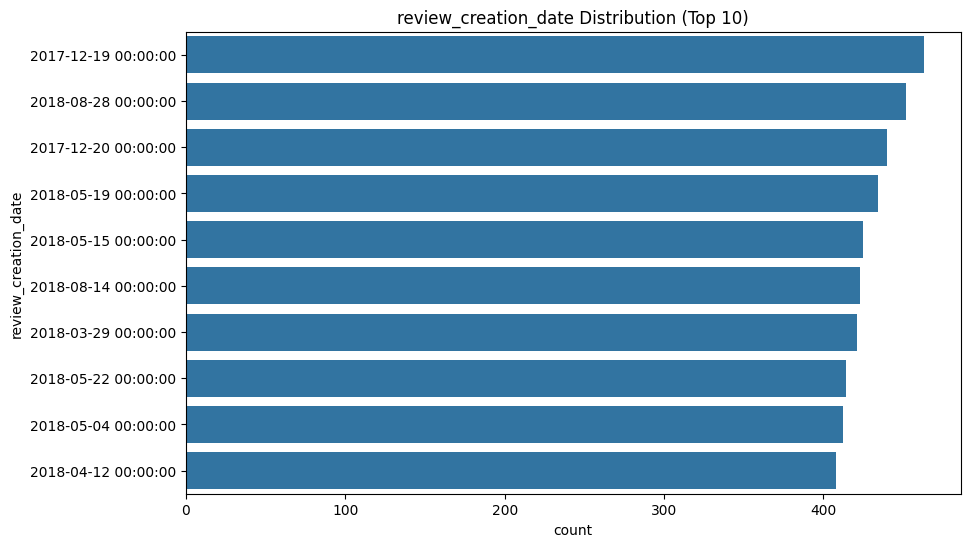


review_answer_timestamp - Unique Values: 98248
review_answer_timestamp
2017-06-15 23:21:05    4
2018-02-26 15:53:18    3
2018-04-07 21:13:05    3
2017-02-21 23:30:22    3
2017-08-12 14:35:35    3
2018-06-17 23:48:04    3
2018-02-23 10:58:06    3
2017-06-25 14:04:22    3
2018-08-06 00:09:52    3
2017-08-30 11:18:29    3
Name: count, dtype: int64


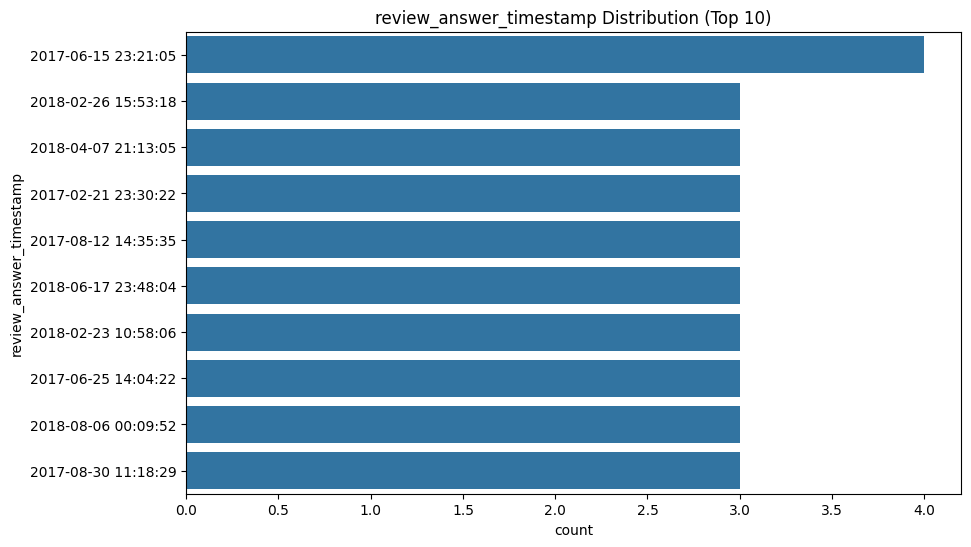


================= Products Dataset =================

Numerical Features Analysis:

Numerical Feature Analysis:
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16

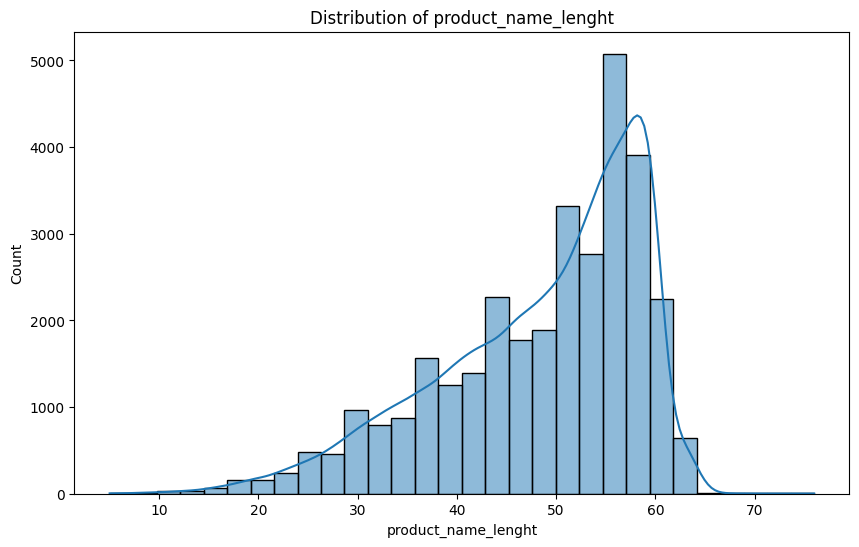

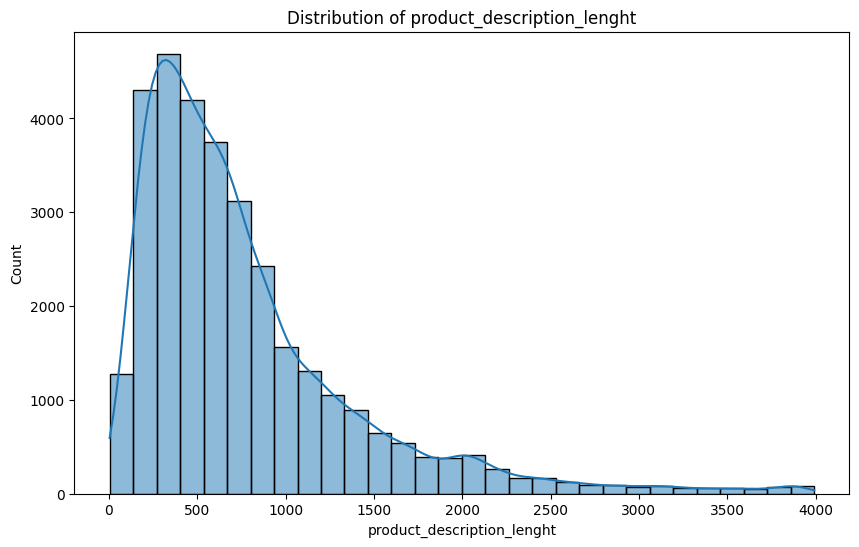

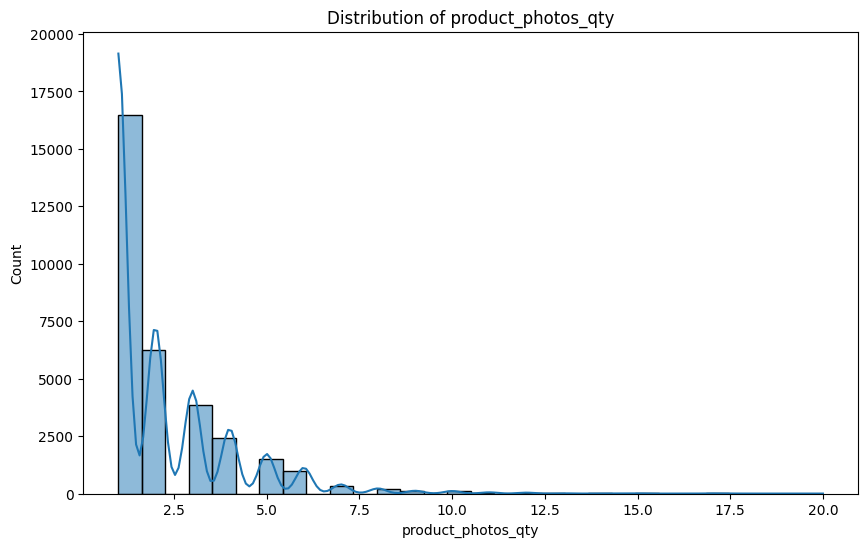

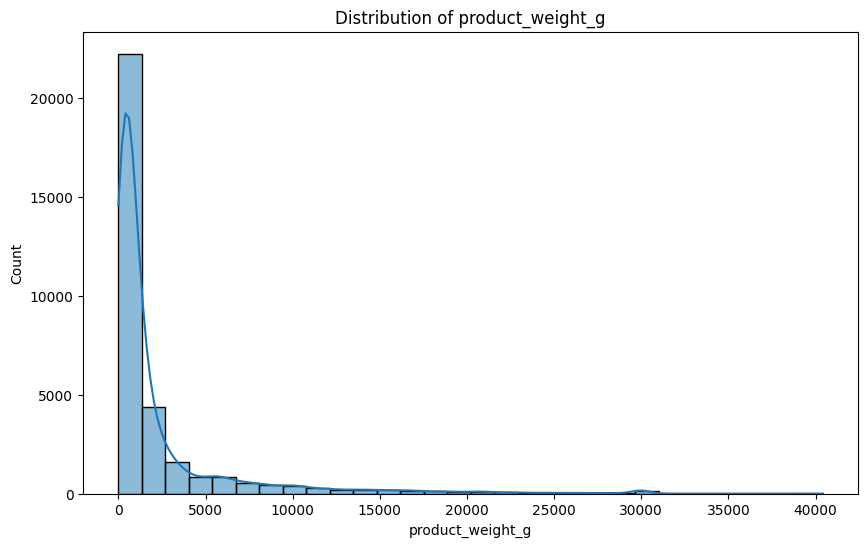

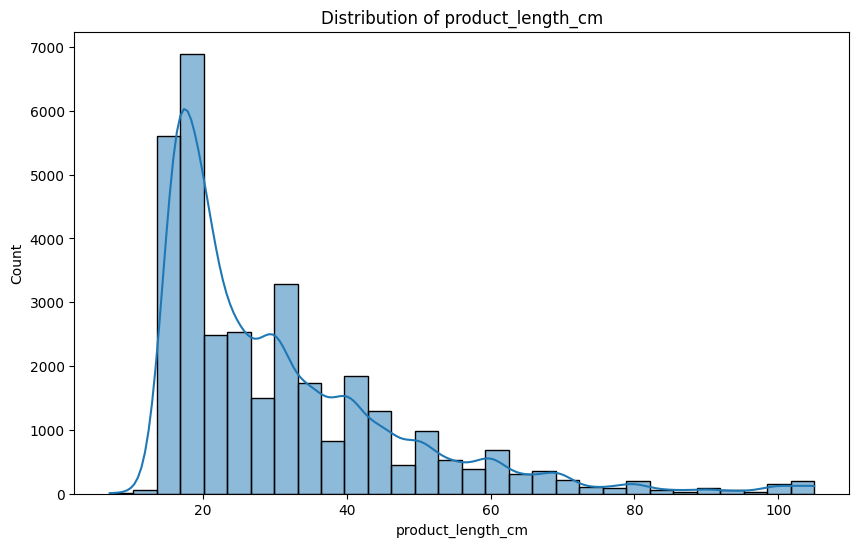

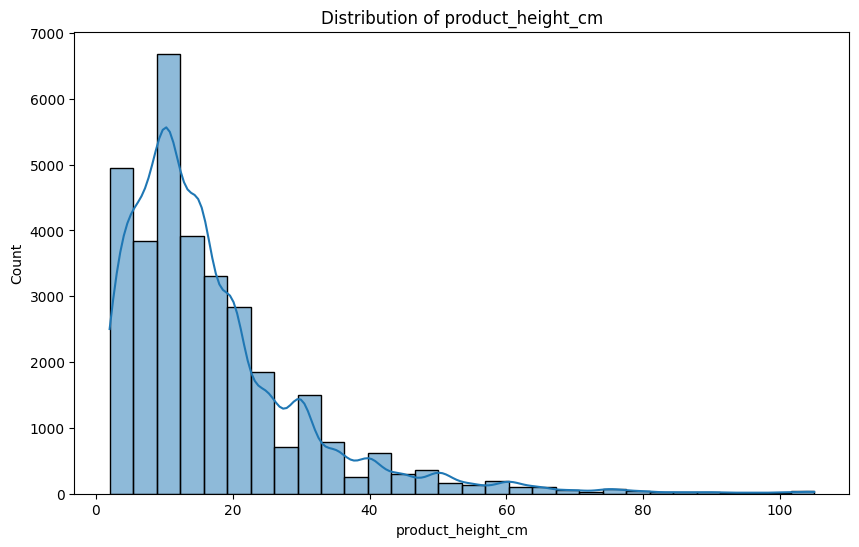

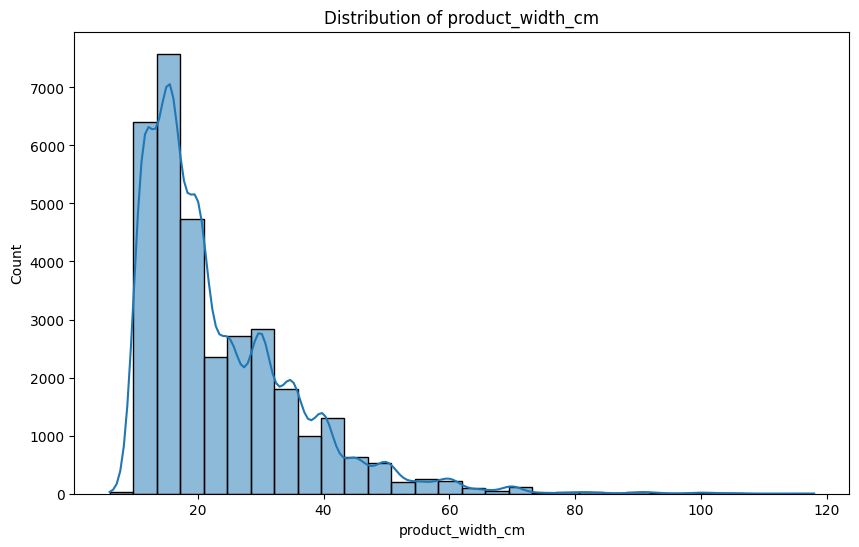


Categorical Features Analysis:

Categorical Feature Analysis:

product_category_name - Unique Values: 73
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64


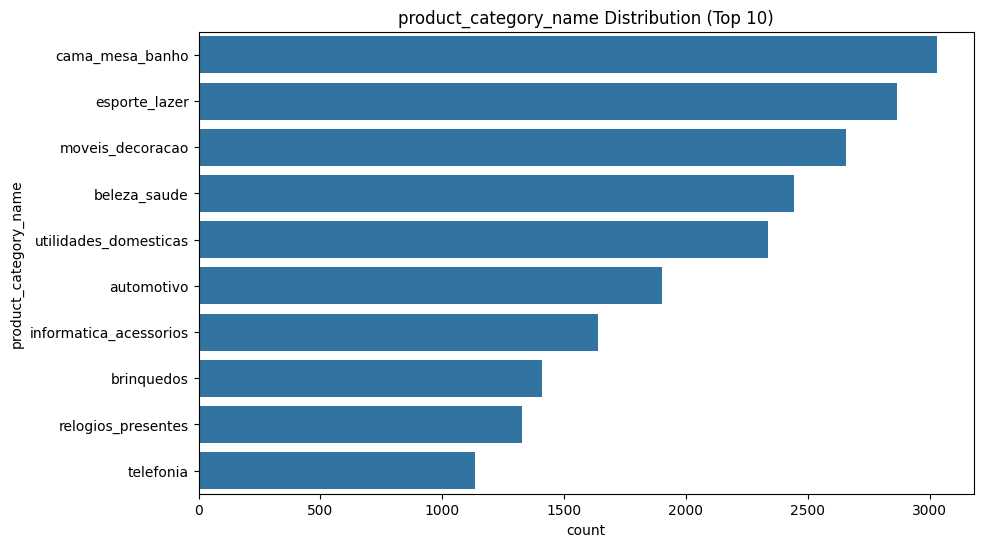


================= Sellers Dataset =================

Numerical Features Analysis:

Numerical Feature Analysis:
No meaningful numerical features in this dataset.

Categorical Features Analysis:

Categorical Feature Analysis:

seller_zip_code_prefix - Unique Values: 2246
seller_zip_code_prefix
14940    49
13660    10
13920     9
16200     9
87050     8
14020     8
1026      8
37540     7
13481     7
35530     6
Name: count, dtype: int64


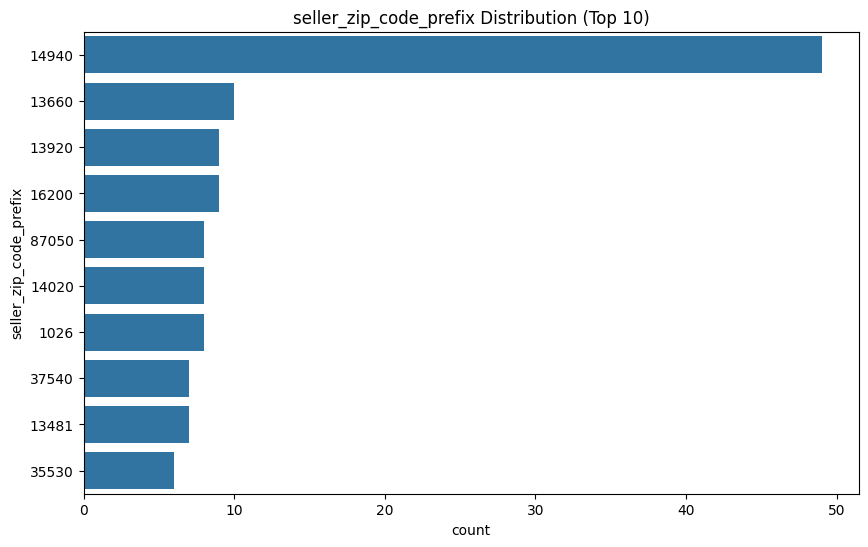


seller_city - Unique Values: 611
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64


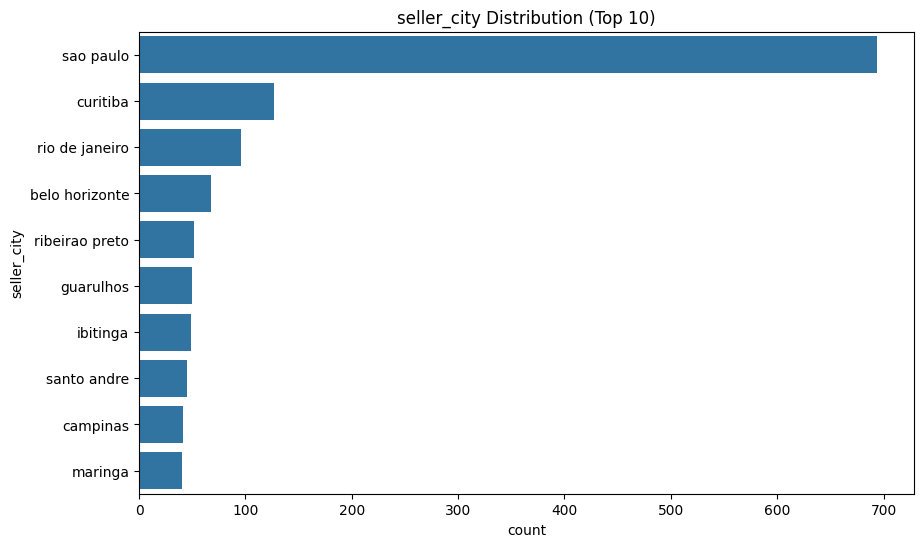


seller_state - Unique Values: 23
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: count, dtype: int64


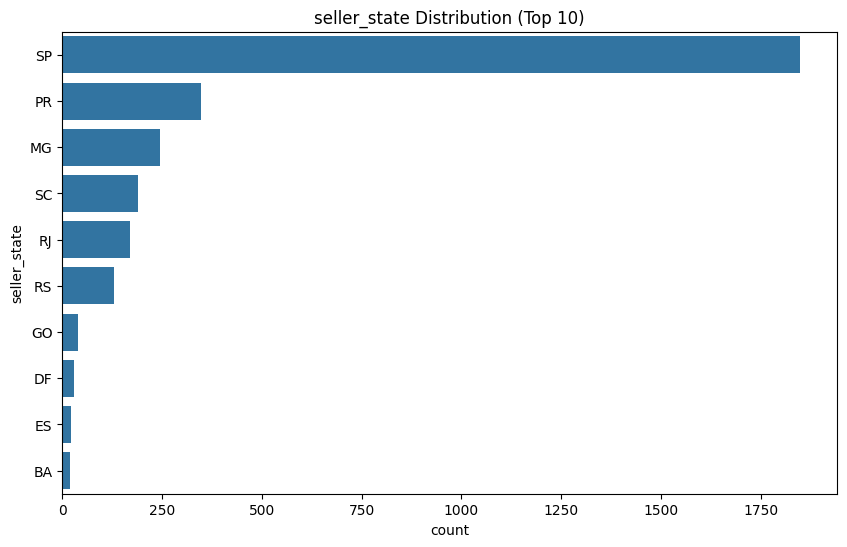

In [ ]:
insignificant_features = [
    'order_id', 'customer_id', 'customer_unique_id',
    'order_item_id', 'product_id', 'seller_id',
    'review_id', 'review_comment_title', 'review_comment_message'
]

# Analysis of numerical features
def numerical_feature_analysis(df, numerical_features):
    print("\nNumerical Feature Analysis:")
    meaningful_numerical_features = [f for f in numerical_features if f not in insignificant_features]

    if len(meaningful_numerical_features) == 0:
        print("No meaningful numerical features in this dataset.")
        return

    print(df[meaningful_numerical_features].describe())

    # Visualize numerical features
    for feature in meaningful_numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature].dropna(), bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

# Categorical feature analysis
def categorical_feature_analysis(df, categorical_features):
    print("\nCategorical Feature Analysis:")
    meaningful_categorical_features = [f for f in categorical_features if f not in insignificant_features]

    if len(meaningful_categorical_features) == 0:
        print("No meaningful categorical features in this dataset.")
        return

    for feature in meaningful_categorical_features:
        print(f"\n{feature} - Unique Values: {df[feature].nunique()}")
        print(df[feature].value_counts().head(10))

        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[feature],
                      order=df[feature].value_counts().iloc[:10].index)
        plt.title(f'{feature} Distribution (Top 10)')
        plt.show()

for name, df in datasets.items():
    print(f"\n================= {name} Dataset =================")
    numerical_features = feature_types[name]["Numerical Features"]
    categorical_features = feature_types[name]["Categorical Features"]

    print("\nNumerical Features Analysis:")
    numerical_feature_analysis(df, numerical_features)

    print("\nCategorical Features Analysis:")
    categorical_feature_analysis(df, categorical_features)

## Data Preparation and Cleaning
To ensure that our data is of high quality and suitable for correlation analysis and subsequent feature engineering, we performed several data preparation and cleaning steps. Based on the insights gained from EDA, we take specific actions to handle missing values, encode categorical variables, and prepare the data for CLV calculation. We handled missing values using different strategies depending on the nature of the variable: (1) For numerical variables, missing values were filled using the median value, which is robust to outliers. (2) For categorical variables, missing values were filled with the label "Unknown" to indicate that the information was not available.

Furthermore, we encoded categorical variables with different methods based on their cardinality: (1) For low-cardinality categorical variables, we used one-hot encoding, creating binary columns for each category. (2) For high-cardinality categorical variables, we used target encoding, where categories are replaced by their mean CLV values, reducing the dimensionality while preserving information.

Lastly, we ensured that all numerical features were scaled using Min-Max scaling to maintain consistent value ranges for correlation analysis.

In [ ]:
df_merged_all_1 = pd.merge(df_olist_customers_dataset, df_CLV, on='customer_unique_id')
df_merged_all_2 = pd.merge(df_olist_orders_dataset, df_merged_all_1, on='customer_id', how='left')
df_merged_all_3 = pd.merge(df_merged_all_2, df_olist_order_payments_dataset, on='order_id', how='left')
df_merged_all_4 = pd.merge(df_merged_all_3, df_olist_order_reviews_dataset, on='order_id', how='left')
df_merged_all_5 = pd.merge(df_merged_all_4, df_olist_order_items_dataset, on='order_id', how='left')
df_merged_all_6 = pd.merge(df_merged_all_5, df_olist_products_dataset, on='product_id', how='left')
df_merged_all_7 = pd.merge(df_merged_all_6, df_olist_sellers_dataset, on='seller_id', how='left')
df_merged_all_8 = pd.merge(df_merged_all_7, df_product_category_name_translation, on='product_category_name', how='left')

print("\nMerged Dataset Shape:", df_merged_all_8.shape)

# Function to automatically encode numerical and categorical features
def encode_features_with_label(df, feature_types):
    df_encoded = df.copy()

    # Handling Numerical Features
    for category, types in feature_types.items():
        numerical_features = types['Numerical Features']
        for feature in numerical_features:
            if feature in df_encoded.columns:
                # Handle missing values (Fill with median)
                df_encoded[feature].fillna(df_encoded[feature].median(), inplace=True)
                # Apply Log Transformation only for skewed features
                if df_encoded[feature].skew() > 1:
                    df_encoded[feature] = np.log1p(df_encoded[feature])

    # Handling Categorical Features
    for category, types in feature_types.items():
        categorical_features = types['Categorical Features']
        for feature in categorical_features:
            if feature in df_encoded.columns:
                # Handle missing values (Fill with "Unknown")
                df_encoded[feature].fillna("Unknown", inplace=True)
                # Ensure all categorical values are of string type
                df_encoded[feature] = df_encoded[feature].astype(str)

                # Automatic encoding of categorical features
                unique_count = df_encoded[feature].nunique()
                if unique_count > 10:  # High Cardinality - Frequency Encoding
                    freq_encoding = df_encoded[feature].value_counts().to_dict()
                    df_encoded[feature] = df_encoded[feature].map(freq_encoding)
                else:  # Low Cardinality - Label Encoding
                    le = LabelEncoder()
                    df_encoded[feature] = le.fit_transform(df_encoded[feature])

    return df_encoded

# Re-encoding the dataset
df_encoded_label = encode_features_with_label(df_merged_all_8, feature_types)
print("\nEncoded Dataset Shape (Label Encoding for Low Cardinality):", df_encoded_label.shape)
print(df_encoded_label.head(5))



Merged Dataset Shape: (119143, 44)

Encoded Dataset Shape (Label Encoding for Low Cardinality): (119143, 44)
   order_id  customer_id  order_status  order_purchase_timestamp  \
0      4674         4674             3                         3   
1      4674         4674             3                         3   
2      4674         4674             3                         3   
3     86494        86494             3                         1   
4     86494        86494             3                         1   

   order_approved_at  order_delivered_carrier_date  \
0                  3                             3   
1                  3                             3   
2                  3                             3   
3                  2                             5   
4                  1                             4   

   order_delivered_customer_date  order_estimated_delivery_date  \
0                              3                            187   
1                     

## Calculate correlation
The purpose of calculating correlations is to identify the strength and direction of the relationship between each feature and the target variable (Customer Lifetime Value - CLV). We used Pearson's correlation coefficient to measure the strength of the linear relationship between each numerical feature and CLV. Features that showed strong correlation with CLV were retained for further analysis.



Re-Encoded Dataset Shape (All Numerical): (119143, 43)

Significant Features with Correlation >= 0.02:
CLV                         1.000000
Customer_Lifespan           0.738069
PF                          0.588084
customer_unique_id          0.141015
payment_value               0.063999
AOV                         0.055256
shipping_limit_date         0.044308
price                       0.040985
customer_zip_code_prefix    0.030176
order_approved_at           0.024472
order_purchase_timestamp    0.022915
payment_installments       -0.025568
order_item_id              -0.045214
customer_id                -0.047478
order_id                   -0.047480
Name: CLV, dtype: float64


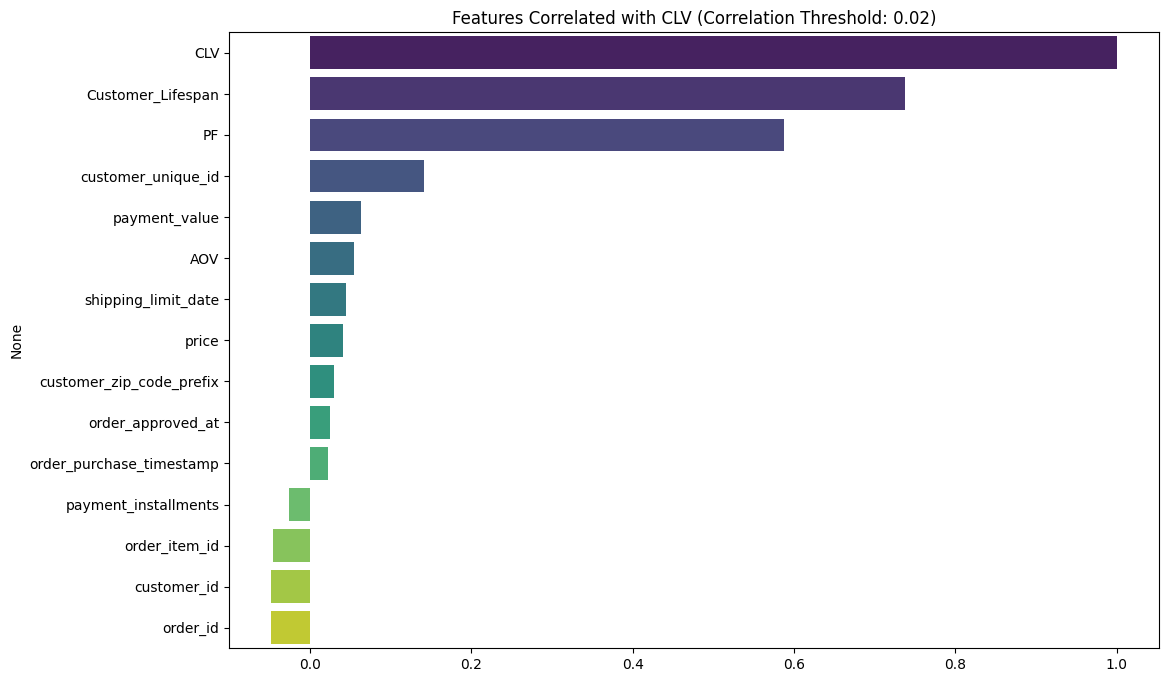

In [ ]:
# Ensure all categorical features are properly encoded
def re_encode_features(df, feature_types):
    df_encoded = df.copy()

    # Handling Numerical Features
    for category, types in feature_types.items():
        numerical_features = types['Numerical Features']
        for feature in numerical_features:
            if feature in df_encoded.columns:
                # Handle missing values (Fill with median)
                df_encoded[feature].fillna(df_encoded[feature].median(), inplace=True)
                # Apply Log Transformation only for skewed features
                if df_encoded[feature].skew() > 1:
                    df_encoded[feature] = np.log1p(df_encoded[feature])

    # Handling Categorical Features
    from sklearn.preprocessing import LabelEncoder
    for category, types in feature_types.items():
        categorical_features = types['Categorical Features']
        for feature in categorical_features:
            if feature in df_encoded.columns:
                # Handle missing values (Fill with "Unknown")
                df_encoded[feature].fillna("Unknown", inplace=True)
                # Ensure all categorical values are of string type
                df_encoded[feature] = df_encoded[feature].astype(str)

                # Automatic encoding of categorical features
                unique_count = df_encoded[feature].nunique()
                if unique_count > 10:  # High Cardinality - Frequency Encoding
                    freq_encoding = df_encoded[feature].value_counts().to_dict()
                    df_encoded[feature] = df_encoded[feature].map(freq_encoding).astype(float)
                else:  # Low Cardinality - Label Encoding
                    le = LabelEncoder()
                    df_encoded[feature] = le.fit_transform(df_encoded[feature].astype(str))

    # Remove any remaining non-numeric columns
    df_encoded = df_encoded.select_dtypes(include=[np.number])
    return df_encoded

# Re-encode the dataset
df_encoded_label = re_encode_features(df_merged_all_8, feature_types)
print("\nRe-Encoded Dataset Shape (All Numerical):", df_encoded_label.shape)

# Calculating correlation with CLV
correlation_with_clv = df_encoded_label.corr()['CLV'].sort_values(ascending=False)

# Set the correlation threshold
correlation_threshold = 0.02

# Filter features with correlation above the threshold
significant_features = correlation_with_clv[abs(correlation_with_clv) >= correlation_threshold]
print("\nSignificant Features with Correlation >= 0.02:")
print(significant_features)

# Visualizing the correlation of selected features with CLV
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(y=significant_features.index, x=significant_features.values, palette='viridis')
plt.title("Features Correlated with CLV (Correlation Threshold: 0.02)")
plt.show()

## Advanced Feature Creation (Feature Transformation)
In this section, we focus on creating an advanced feature, estimated_delay_hours, which measures the difference (in hours) between the actual delivery time and the estimated delivery time for each order. The motivation behind this feature is that while other features like Average Payment Value per Order or Price per Weight are directly related to price (which indirectly affects AOV), estimated_delay_hours captures a unique aspect of customer experience and service quality.


Estimated Delay Hours - Statistics:
count    119143.000000
mean       -264.620209
std         244.723225
min       -3504.386944
25%        -389.425833
50%        -274.025278
75%        -149.221250
max        4535.401944
Name: estimated_delay_hours, dtype: float64


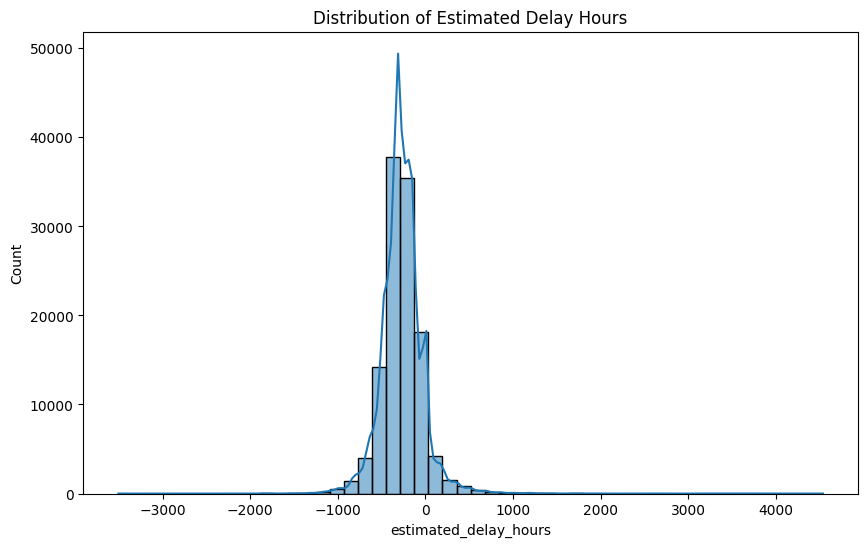


Correlation of Estimated Delay Hours with CLV:
-0.019193019315978686


In [ ]:
df_encoded_label['order_delivered_customer_date'] = pd.to_datetime(
    df_merged_all_8['order_delivered_customer_date'], errors='coerce'
)
df_encoded_label['order_estimated_delivery_date'] = pd.to_datetime(
    df_merged_all_8['order_estimated_delivery_date'], errors='coerce'
)

# If these columns contain only dates, we add a default time (00:00:00)
df_encoded_label['order_delivered_customer_date'] = df_encoded_label['order_delivered_customer_date'].apply(
    lambda x: x if pd.notnull(x) else pd.NaT
)
df_encoded_label['order_estimated_delivery_date'] = df_encoded_label['order_estimated_delivery_date'].apply(
    lambda x: x if pd.notnull(x) else pd.NaT
)

# Recalculate Estimated Delay Hours
df_encoded_label['estimated_delay_hours'] = (
    (df_encoded_label['order_delivered_customer_date'] - df_encoded_label['order_estimated_delivery_date']).dt.total_seconds() / 3600
)

# Handling missing values (fill with 0 for missing values)
df_encoded_label['estimated_delay_hours'].fillna(0, inplace=True)

# Display basic statistics of the new feature
print("\nEstimated Delay Hours - Statistics:")
print(df_encoded_label['estimated_delay_hours'].describe())

# Visualize the distribution of Estimated Delay Hours
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_encoded_label['estimated_delay_hours'], bins=50, kde=True)
plt.title("Distribution of Estimated Delay Hours")
plt.show()

# Calculate correlation with CLV
correlation_with_clv = df_encoded_label.corr()['CLV'].sort_values(ascending=False)
print("\nCorrelation of Estimated Delay Hours with CLV:")
print(correlation_with_clv['estimated_delay_hours'])